In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("../players_22.csv")

/var/folders/5_/2y4z28sj70dd1l686776f_500000gn/T/ipykernel_12059/1955667029.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../players_22.csv")


In [3]:
data.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [4]:
features = ["overall", "potential", "age","value_eur","wage_eur"]

In [5]:
players = data.dropna(subset=features)

In [6]:
data = data[features].copy()

In [7]:
data.head()

,overall,potential,age,value_eur,wage_eur
0,93,93,34,78000000.0,320000.0
1,92,92,32,119500000.0,270000.0
2,91,91,36,45000000.0,270000.0
3,91,91,29,129000000.0,270000.0
4,91,91,30,125500000.0,350000.0


In [8]:
data = ((data - data.min()) / (data.max() - data.min())) *9 + 1
data.head()

,overall,potential,age,value_eur,wage_eur
0,10.000000,9.608696,5.263158,4.618307,9.227468
1,9.804348,9.413043,4.789474,6.543654,7.939914
2,9.608696,9.217391,5.736842,3.087308,7.939914
3,9.608696,9.217391,4.078947,6.984396,7.939914
4,9.608696,9.217391,4.315789,6.822018,10.000000


In [9]:
def get_centroids(data,k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids,axis=1)

In [10]:
centroids = get_centroids(data,3)
centroids

/var/folders/5_/2y4z28sj70dd1l686776f_500000gn/T/ipykernel_12059/1643585641.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


,0,1,2
overall,5.891304,5.891304,3.152174
potential,4.717391,6.478261,4.913043
age,3.842105,1.710526,3.605263
value_eur,1.217634,1.171240,1.009789
wage_eur,1.038627,1.000000,1.090129


In [11]:
def get_labels(data,centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x)**2).sum(axis = 1)))
    return distances.idxmin(axis=1)

In [15]:
distances = centroids.apply(lambda x: np.sqrt(((data - x)**2).sum(axis = 1)))
distances

,0,1,2
0,11.020314,10.903013,12.285283
1,10.688911,10.508569,11.976936
2,9.422445,9.453400,10.770021
3,10.724197,10.434867,11.960516
4,12.083406,11.876048,13.186612
...,...,...,...
19234,5.982531,6.955796,4.135587
19235,5.622810,6.029531,3.472464
19236,5.761058,6.534871,3.763274
19237,5.564641,5.917386,3.366109


In [72]:
def get_new_centroids(data,labels):
    return data.groupby(labels).apply(lambda x : np.exp(np.log(x).mean())).T


In [83]:
from sklearn.decomposition import PCA
from IPython.display import clear_output

def plot_clusters(data,labels,centroids,iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1], marker='.', s=200, c='red')
    plt.show()


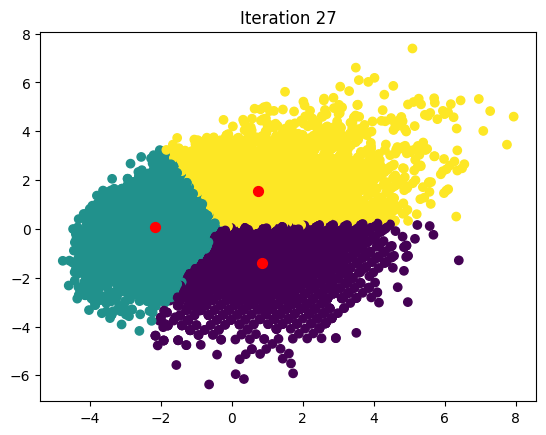

In [84]:
iteration = 0
old_centroid = pd.DataFrame()
centroid = get_centroids(data,3)
while iteration < 100 and not centroid.equals(old_centroid):
    old_centroid = centroid
    labels = get_labels(data,centroid)
    centroid = get_new_centroids(data,labels)
    plot_clusters(data,labels,centroid,iteration)
    iteration+=1

In [85]:
from sklearn.datasets import make_blobs

In [99]:
# Create 300 samples with 3 clusters and 2 features
X, y_true = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42)

In [100]:
df = pd.DataFrame(X, columns=["Feature1", "Feature2"])
df["Label"] = y_true  # True label (optional)
print(df.head())

   Feature1  Feature2  Label
0 -7.338988 -7.729954      2
1 -7.740041 -7.264665      2
2 -1.686653  7.793442      0
3  4.422198  3.071947      1
4 -8.917752 -7.888196      2


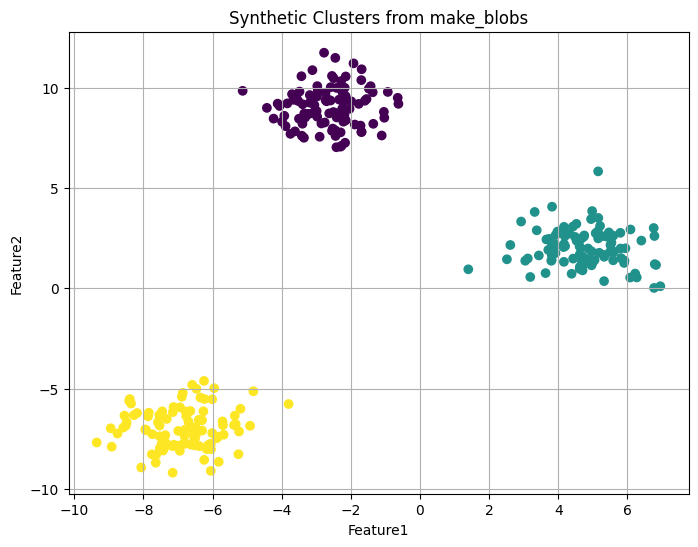

In [101]:
plt.figure(figsize=(8, 6))
plt.scatter(df["Feature1"], df["Feature2"], c=df["Label"], cmap='viridis')
plt.title("Synthetic Clusters from make_blobs")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.grid(True)
plt.show()

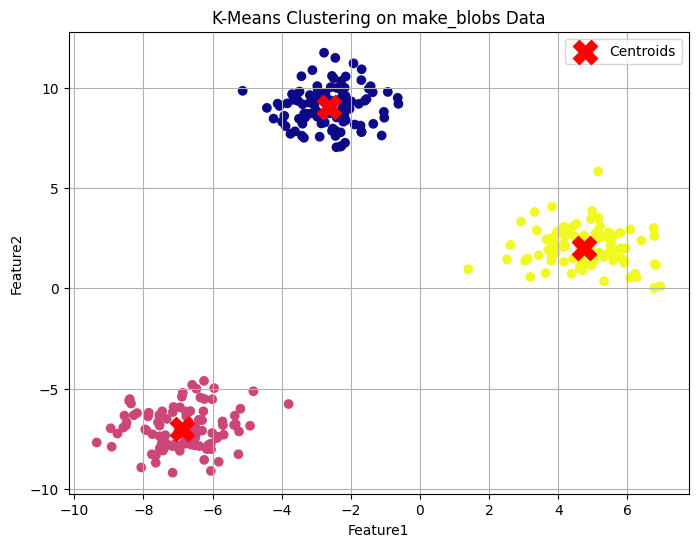

In [102]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(df[["Feature1", "Feature2"]])

# Plot the predicted clusters
plt.figure(figsize=(8, 6))
plt.scatter(df["Feature1"], df["Feature2"], c=df["Cluster"], cmap='plasma')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering on make_blobs Data")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x,y = sp.symbols('x,y')

In [7]:
circle = x**2 + y**2 - 1

In [9]:
l_circle = sp.lambdify((x,y),circle)

In [11]:
x_val = np.linspace(0,100,20)
y_val = np.linspace(0,100,20)

In [12]:
cir_val = l_circle(x_val,y_val)

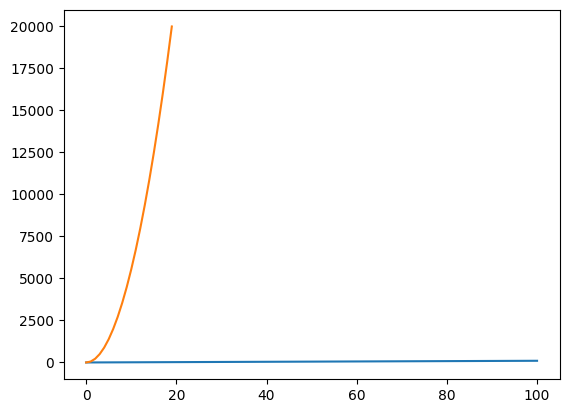

In [15]:
plt.plot(x_val,y_val,cir_val)

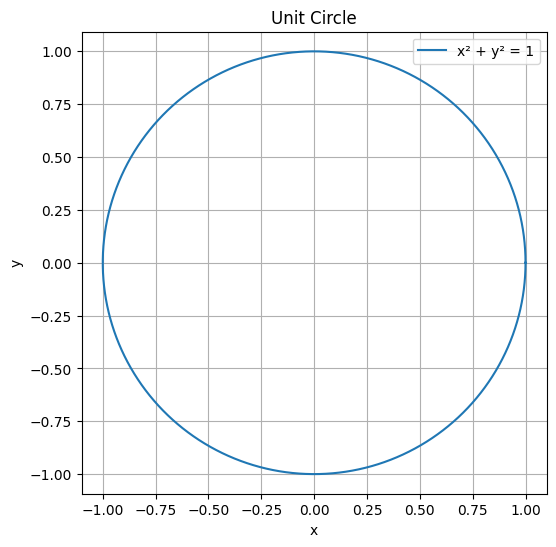

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parametric equations for a circle of radius 1, centered at (0,0)
theta = np.linspace(0, 2 * np.pi, 200)
x_vals = np.cos(theta)
y_vals = np.sin(theta)

plt.figure(figsize=(6,6))
plt.plot(x_vals, y_vals, label='x² + y² = 1')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Unit Circle')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

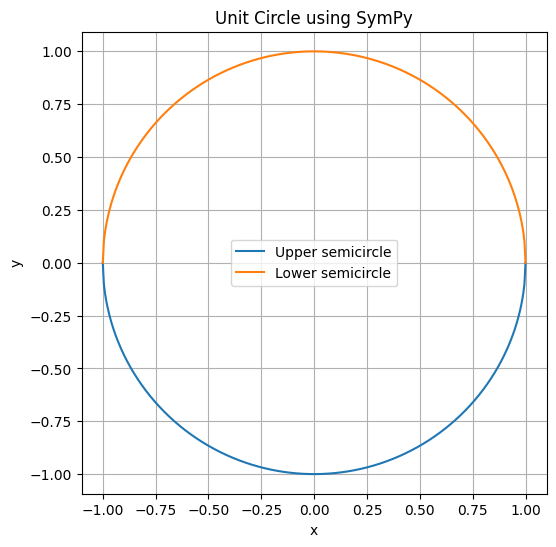

In [24]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define symbols
x, y = sp.symbols('x y')

# Circle equation: x^2 + y^2 = 1
circle_eq = x**2 + y**2 - 1

# Solve for y (returns two solutions: upper and lower semicircle)
y_solutions = sp.solve(circle_eq, y)

# Lambdify both solutions
y_upper = sp.lambdify(x, y_solutions[0], 'numpy')
y_lower = sp.lambdify(x, y_solutions[1], 'numpy')

# Generate x values in the valid range [-1, 1]
x_vals = np.linspace(-1, 1, 400)
y_upper_vals = y_upper(x_vals)
y_lower_vals = y_lower(x_vals)

# Plot
plt.figure(figsize=(6,6))
plt.plot(x_vals, y_upper_vals, label='Upper semicircle')
plt.plot(x_vals, y_lower_vals, label='Lower semicircle')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Unit Circle using SymPy')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

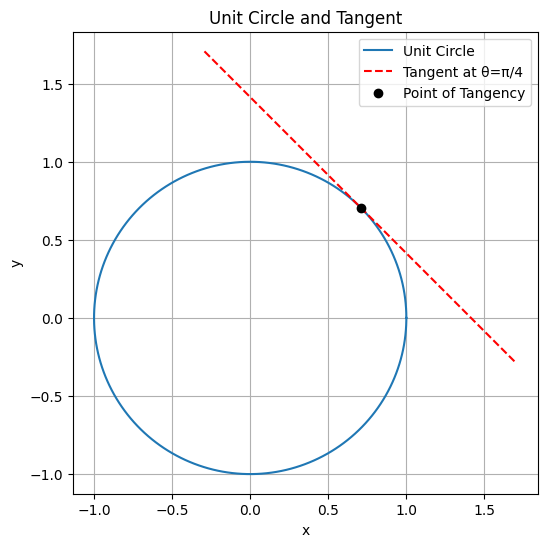

In [25]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define symbols
x, y = sp.symbols('x y')

# Circle equation: x^2 + y^2 = 1
circle_eq = x**2 + y**2 - 1

# Choose a point on the circle (e.g., theta = pi/4)
theta = np.pi / 4
x0 = np.cos(theta)
y0 = np.sin(theta)

# The tangent at (x0, y0) has equation: (x0)x + (y0)y = 1
# Rearranged: y = (-x0/y0)x + 1/y0
slope = -x0 / y0
intercept = 1 / y0

# Generate x values for the tangent line near x0
x_tangent = np.linspace(x0 - 1, x0 + 1, 100)
y_tangent = slope * x_tangent + intercept

# Circle (using parametric form)
theta_vals = np.linspace(0, 2 * np.pi, 400)
x_circle = np.cos(theta_vals)
y_circle = np.sin(theta_vals)

plt.figure(figsize=(6,6))
plt.plot(x_circle, y_circle, label='Unit Circle')
plt.plot(x_tangent, y_tangent, 'r--', label='Tangent at θ=π/4')
plt.scatter([x0], [y0], color='black', zorder=5, label='Point of Tangency')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Unit Circle and Tangent')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

In [26]:
theta_vals = np.linspace(0, 2 * np.pi, 400)

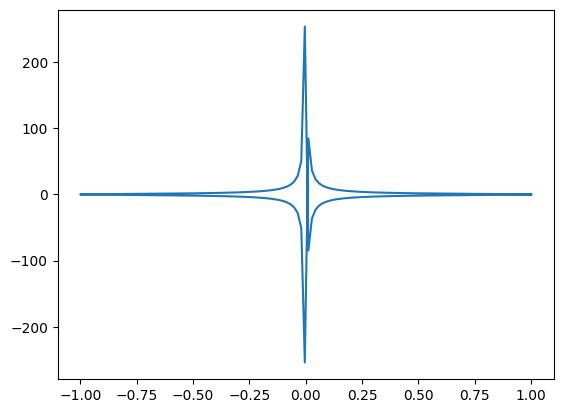

In [37]:
plt.plot(np.cos(theta_vals),np.tan(theta_vals))